# Microsft Studio Recommendation

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Importing libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data files

#### IMDB data files

In [2]:
name_basics_df = pd.read_csv("project-data-sets/work/imdb/name.basics.csv")
title_akas_df = pd.read_csv("project-data-sets/work/imdb/title.akas.csv")
title_basics_df = pd.read_csv("project-data-sets/work/imdb/title.basics.csv")
title_crew_df = pd.read_csv("project-data-sets/work/imdb/title.crew.csv")
title_principals_df = pd.read_csv("project-data-sets/work/imdb/title.principals.csv")
title_ratings_df = pd.read_csv("project-data-sets/work/imdb/title.ratings.csv")

#### The Numbers data file

In [3]:
tns_df = pd.read_csv("project-data-sets/work/theNumbers/tn.movie_budgets.csv", index_col = 0)

#### Box Office Mojo data file

In [4]:
bom_df = pd.read_csv("project-data-sets/work/bom/bom.movie_gross.csv")

#### Rotten Tomatoes data files

In [5]:
rot_info = pd.read_csv("project-data-sets/work/rottenToms/rt.movie_info.tsv", sep = "\t")
# rot_revs = pd.read_csv("project-data-sets/work/rottenToms/rt.reviews.tsv", sep = "\t")

#### The Movie DB data file

In [6]:
the_movie = pd.read_csv("project-data-sets/work/theMovieDB/tmdb.movies.csv", index_col = 0)

## Exploring and Basic data cleaning
We explore the shape and information. We also perform basic data cleaning practices, that is, dealing with missing values, checking for possible duplicate values. We will also check for possible data sets which can be used for our analysis.

### IMDB Data frames
We first start with the imdb data files.
#### name_basics_df

In [7]:
# Checking the first five rows of the data frame
name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [8]:
name_basics_df.columns
# The data frame contains 6 columns

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [9]:
name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [10]:
# The columns of birth_year and death_year have a significant number of missing values
# The columns appear not to be relevant in our analysi concerning our business question
# therefore we drop the columns entirely
# There is no set method on dealing with missing values in the primary_profession and
# known_for_titles, therefore for the time being we note and proceed to the next data frame
name_basics_df.drop(["birth_year", "death_year"], axis = 1, inplace = True)

#### title_akas_df dataframe

In [11]:
# Checking the first 5 entries
title_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [12]:
# Obtaining basic info
title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [ ]:
# The columns of types, attributes, and region have a significant number of missing values
# The language column has a significantly higher number of entries compared to the entries
# of our data frame.
# This data set has little information which may need for analysis.
# So we ignore this data set entirely

#### title_basics_df dataframe

In [13]:
# peek at the dataframe
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [15]:
# The tconst column can be used to merge with other dataframes 
# which we have observed it as a key in another table
# The genres column has a small number of missing values
# around 4% to be precise. Therefore we will drop the rows
# with missing values since I don't think it will significatly
# affect our data set.
((title_basics_df.genres.isna().sum()) / len(title_basics_df)) * 100
((title_basics_df.original_title.isna().sum()) / len(title_basics_df)) * 100

0.014369389095686446

In [16]:
# Dropping the null rows using the genre column
# Also dropping the runtime_minutes column as it
# is not significant to the question in hand
# The original column also contains titles which are
# of a different language hence we may not need it.
# Therefore dropping it.
title_basics_df.drop(["original_title"], axis = 1, inplace = True)
title_basics_df.drop(["runtime_minutes"], axis = 1, inplace = True)
title_basics_df.dropna(subset = ["genres"], inplace = True)

In [17]:
title_basics_df.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [18]:
# To delete later
title_basics_df.loc[title_basics_df.primary_title == "Avatar"]

,tconst,primary_title,start_year,genres
17060,tt1775309,Avatar,2011,Horror


#### title_crew_df

In [19]:
# Taking a peek of the dataframe
title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [20]:
title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [21]:
(title_crew_df.writers.isna().sum() / len(title_crew_df)) * 100

24.55318042478651

In [ ]:
# This is a dataframe consisting of foreign keys
# The writers column has a number of missing values
# around 24.5 %
# This data set seems more of a connector so we might ignore it.

#### title_principals_df dataframe

In [22]:
title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [23]:
title_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [93]:
# The characters column has a significanct number of missing values.
# The job column also has a significant number of missing values
# The job column has a bit of important data .
# 

1028186

In [24]:
title_principals_df.drop(["characters"], axis = 1, inplace = True)

#### title_ratings_df

In [25]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [26]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# There is no missing values in the data set

### Combining the relevant data frames (IMDB)

In [27]:
imdb_reviews = title_basics_df.join(title_ratings_df.set_index("tconst"), how = "inner", on = "tconst", rsuffix = "r")
imdb_reviews.head()

,tconst,primary_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119


In [28]:
imdb_reviews.rename(columns = {"primary_title": "movie"}, inplace = True)

In [29]:
imdb_reviews.shape

(73052, 6)

### The Numbers Dataframe

In [30]:
tns_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
tns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [ ]:
# The data frame contains no missing values

In [32]:
# Removing the $ sign and commas from the production_budget, domestic_gross and worldwide_gross columns
# function to strip columns
def clean_sign(df, column, sign):
    df[column] = df[column].str.strip(sign)

# Function to remove punctuations
def clean_punctuations(df, column, punctuation):
    df[column] = df[column].str.replace(punctuation, "")

In [33]:
# Cleaning column dollar signs
clean_sign(tns_df, "production_budget", "$")
clean_sign(tns_df, "domestic_gross", "$")
clean_sign(tns_df, "worldwide_gross", "$")

# Cleaning column punctuations
clean_punctuations(tns_df, "production_budget", ",")
clean_punctuations(tns_df, "domestic_gross", ",")
clean_punctuations(tns_df, "worldwide_gross", ",")

In [34]:
# changing the production_budget, domestic_gross and worldwide_gross
# to numeric data type
tns_df = tns_df.astype({"production_budget": float, "domestic_gross": float, "worldwide_gross": float})

In [35]:
# since it shows there are no missing values, 
# we check if there are values which are zeroes
print(f"The domestic_gross column has {(tns_df.domestic_gross == 0).sum()} with zero as entries.")
print(f"The worldwide_gross column has {(tns_df.worldwide_gross == 0).sum()} with zero as entries.")

The domestic_gross column has 548 with zero as entries.
The worldwide_gross column has 367 with zero as entries.


In [36]:
# Assuming the entries with zero on domestic and worldwide gross
# income are not mainstream since we do not have their respective incomes
# Therefore I choose to drop the rows with zero entries from these columns
# reduced to 5234
tns_df = tns_df[(tns_df.domestic_gross != 0) | (tns_df.worldwide_gross != 0)]

In [37]:
tns_df[(tns_df.domestic_gross == 0)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000.0,0.0,60680125.0
20,"Jan 22, 2019",Renegades,77500000.0,0.0,1521672.0
21,"Oct 26, 2018",Air Strike,65000000.0,0.0,516279.0
26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
68,"Dec 31, 2006",Les BronzÃ©s 3: amis pour la vie,42000000.0,0.0,83833602.0
...,...,...,...,...,...
91,"Mar 24, 2015",Along the Roadside,250000.0,0.0,3234.0
53,"Dec 31, 2015",Lumea e a mea,168000.0,0.0,29678.0
62,"Dec 31, 2013",Speak No Evil,150000.0,0.0,32927.0


In [38]:
tns_df.shape

(5415, 5)

### Box Office Mojo

In [39]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [40]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
# The column foreign gross contains a significant number of missing values
# Not sure how to deal with missing values come back later

In [41]:
bom_df.rename(columns = {"title": "movie"}, inplace = True)

### The movie data frame

In [42]:
the_movie.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [43]:
the_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
# The dataframe columns have no missing values
# The columns original_title and title appear repetitive so 
# we will drop one. The genre column only contains the identity of 
# of the genres, we could look to join it with the imdb_reviews
# dataframe based on the title and movie column.
# Also we look to drop the id, original_language

In [44]:
the_movie.drop(["genre_ids", "id", "original_language", "original_title", "popularity"], axis = 1, inplace = True)
the_movie.head()

,release_date,title,vote_average,vote_count
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,2010-03-26,How to Train Your Dragon,7.7,7610
2,2010-05-07,Iron Man 2,6.8,12368
3,1995-11-22,Toy Story,7.9,10174
4,2010-07-16,Inception,8.3,22186


In [45]:
the_movie.rename(columns = {"title": "movie"}, inplace = True)

## Creating a master table
We will create a table which is a combination of different tables in order to better analyse our business question.

In [ ]:
# imdb_reviews dataframe
# tns_df budget dataframe
# bom_df dataframe
# the_movie dataframe

In [46]:
imdb_reviews.head(3)

,tconst,movie,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517


In [47]:
imdb_reviews.drop(["tconst"], axis = 1, inplace = True)

In [48]:
tns_df.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


In [49]:
tns_df.drop(["release_date"], axis = 1, inplace = True)

In [50]:
bom_df.head(3)

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [51]:
# Changing the names to match criteria for join
bom_df.rename(columns = {"foreign_gross": "worldwide_gross"}, inplace = True)

In [52]:
the_movie.head(3)

,release_date,movie,vote_average,vote_count
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,2010-03-26,How to Train Your Dragon,7.7,7610
2,2010-05-07,Iron Man 2,6.8,12368


In [ ]:
# combining

In [53]:
combined = imdb_reviews.merge(tns_df, how = "outer", left_on = "movie", right_on = "movie")
combined.head()

,movie,start_year,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
0,Sunghursh,2013.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN
1,One Day Before the Rainy Season,2019.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN
2,The Other Side of the Wind,2018.0,Drama,6.9,4517.0,NaN,NaN,NaN
3,Sabse Bada Sukh,2018.0,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN
4,The Wandering Soap Opera,2017.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN


In [54]:
combined.shape

(76592, 8)

In [55]:
# adding values which are missing from the movie colun to the new data set.
combined1 = combined.combine_first(tns_df)
combined1.head()

,averagerating,domestic_gross,genres,movie,numvotes,production_budget,start_year,worldwide_gross
0,7.0,NaN,"Action,Crime,Drama",Sunghursh,77.0,NaN,2013.0,NaN
1,7.2,760507625.0,"Biography,Drama",One Day Before the Rainy Season,43.0,425000000.0,2019.0,2.776345e+09
1,7.2,293004164.0,"Biography,Drama",One Day Before the Rainy Season,43.0,175000000.0,2019.0,7.314634e+08
1,7.2,111506430.0,"Biography,Drama",One Day Before the Rainy Season,43.0,145000000.0,2019.0,2.698064e+08
1,7.2,30212620.0,"Biography,Drama",One Day Before the Rainy Season,43.0,120000000.0,2019.0,4.962818e+07


In [56]:
combined1.shape

(81907, 8)

In [57]:
combined1.loc[combined1.movie == "Iron Man"]

,averagerating,domestic_gross,genres,movie,numvotes,production_budget,start_year,worldwide_gross
37048,5.6,318604126.0,"Comedy,Drama,Family",Iron Man,14.0,186000000.0,2013.0,585171547.0


In [58]:
combined1.drop_duplicates(subset = ["movie", "averagerating"], keep = False, inplace = True)

In [59]:
# Creating a master dataframe with all the 4 dataframes combined
master_df = combined1.merge(the_movie, how = "outer", left_on = "movie", right_on = "movie")
master_df.head()

,averagerating,domestic_gross,genres,movie,numvotes,production_budget,start_year,worldwide_gross,release_date,vote_average,vote_count
0,7.0,NaN,"Action,Crime,Drama",Sunghursh,77.0,NaN,2013.0,NaN,NaN,NaN,NaN
1,7.5,85710210.0,"Action,Adventure,Sci-Fi",Alita: Battle Angel,88207.0,170000000.0,2019.0,402976036.0,NaN,NaN,NaN
2,7.5,NaN,"Drama,Thriller",Moving Target,26.0,NaN,2011.0,NaN,NaN,NaN,NaN
3,3.3,NaN,Action,Segurança Nacional,260.0,NaN,2010.0,NaN,NaN,NaN,NaN
4,7.3,NaN,Documentary,My Nappy Roots: A Journey Through Black Hair-i...,16.0,NaN,2010.0,NaN,NaN,NaN,NaN


In [60]:
# Cleaning master dataframe
master_df.drop(["release_date"], axis = 1, inplace = True)

In [61]:
# dropping null rows based ong the domestic and worldwide gross columns
master_df.dropna(subset = ["domestic_gross", "worldwide_gross"], inplace = True)

In [62]:
master_df.head()

,averagerating,domestic_gross,genres,movie,numvotes,production_budget,start_year,worldwide_gross,vote_average,vote_count
1,7.5,85710210.0,"Action,Adventure,Sci-Fi",Alita: Battle Angel,88207.0,170000000.0,2019.0,402976036.0,NaN,NaN
5,7.4,182207973.0,"Biography,Drama,History",Lincoln,228701.0,65000000.0,2012.0,273346281.0,6.8,2261.0
7,6.8,37151.0,"Comedy,Drama,Romance",Before We Go,45181.0,3000000.0,2014.0,483938.0,6.5,985.0
8,7.0,37151.0,"Documentary,Drama,News",Before We Go,22.0,3000000.0,2014.0,483938.0,6.5,985.0
9,6.3,0.0,"Drama,Romance,War",The History of Love,1024.0,20000000.0,2016.0,476624.0,NaN,NaN


In [63]:
# condensing the domestic_gross and worldwide_gross int a ratio by dividing them with 1mil
master_df.worldwide_gross = master_df.worldwide_gross / 1000000
master_df.domestic_gross = master_df.domestic_gross / 1000000

In [65]:
# Creating combined average rating to incorporate all combined dataframes data
# Dropping the unrequired columns in the data set ie. averagerating and vote_average
master_df["combined_avg"] = ((master_df.averagerating * master_df.numvotes) + 
                             (master_df.vote_average * master_df.vote_count)) / (master_df.numvotes + master_df.vote_count)
master_df.drop(["averagerating", "vote_average", "numvotes", "vote_count"], axis = 1, inplace = True)

In [66]:
# splitting the genres column
master_df = master_df.assign(genres = master_df["genres"].str.split(",")).explode("genres")
master_df.head()

,domestic_gross,genres,movie,production_budget,start_year,worldwide_gross,combined_avg
1,85.710210,Action,Alita: Battle Angel,170000000.0,2019.0,402.976036,NaN
1,85.710210,Adventure,Alita: Battle Angel,170000000.0,2019.0,402.976036,NaN
1,85.710210,Sci-Fi,Alita: Battle Angel,170000000.0,2019.0,402.976036,NaN
5,182.207973,Biography,Lincoln,65000000.0,2012.0,273.346281,7.394126
5,182.207973,Drama,Lincoln,65000000.0,2012.0,273.346281,7.394126


In [67]:
# We drop the missing values in the combined_avg column
master_df.dropna(subset = ["combined_avg"], inplace = True)
master_df.info()
# Now our data frame is ready for analysis.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5866 entries, 5 to 73036
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   domestic_gross     5866 non-null   float64
 1   genres             5866 non-null   object 
 2   movie              5866 non-null   object 
 3   production_budget  5866 non-null   float64
 4   start_year         5866 non-null   float64
 5   worldwide_gross    5866 non-null   float64
 6   combined_avg       5866 non-null   float64
dtypes: float64(5), object(2)
memory usage: 366.6+ KB


## Data Analysis

We first try and visualize the counts per genre to see which is the popularity of different genres.

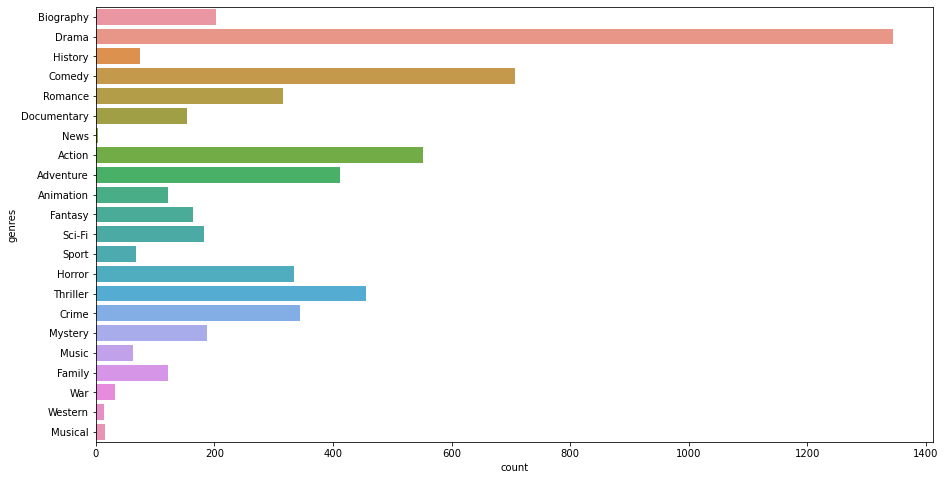

In [207]:
# Ploting a count plot on the number of movies made per genre
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.countplot(y="genres", data = master_df)
fig.savefig("Plot on movies made.png")

From the figure above, we can see that the most popular genre is Drama followed by Comedy and Action. We would recommend, Microsoft to put in effort towards making movies based on this genres.

In [217]:
# Next we try to visualize the ratings according to the given genres
# We create a function to plot barplts
def bar_plot(data,var_x,var_y):
    sns.set_style("darkgrid")
    bar,ax = plt.subplots(figsize=(15,8))
    ax = sns.barplot(x=var_x,y=var_y, data=data, palette='bright',orient='h')
    ax.set_title(f'The plot of {var_y.title()} against {var_x.title()}', fontsize= 20)
    ax.set_xlabel(f"{var_x}", fontsize=20)
    ax.set_ylabel(f"{var_y}", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    bar.savefig(f"{var_x}_{var_y}.png")

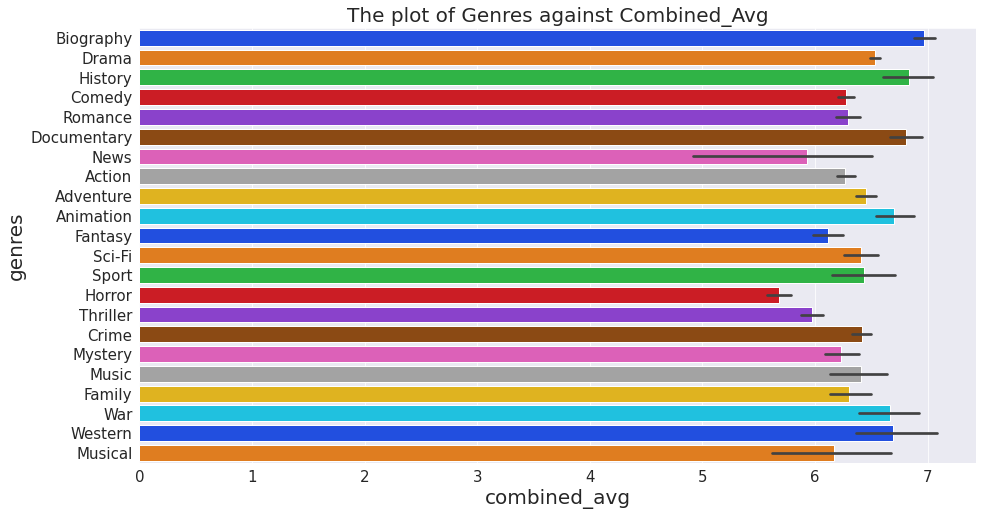

In [218]:
bar_plot(master_df, "combined_avg", "genres")

From the figure above, Biography, History and Documentary do have the highest ratings, therefore it would be beneficial to try and create content towards targeting this segment of the market.

In [220]:
# Creating a new dataframe with average domestic gross earnings per genre
topratings_gross = master_df[["movie", "genres", "domestic_gross"]]
topratings_gross = topratings_gross.groupby("genres", as_index = False).mean()
topratings_gross.sort_values("domestic_gross", ascending = False, inplace = True)

In [221]:
topratings_gross.head()

,genres,domestic_gross
2,Animation,133.145138
1,Adventure,115.205159
17,Sci-Fi,102.023227
0,Action,79.643979
9,Fantasy,70.886488


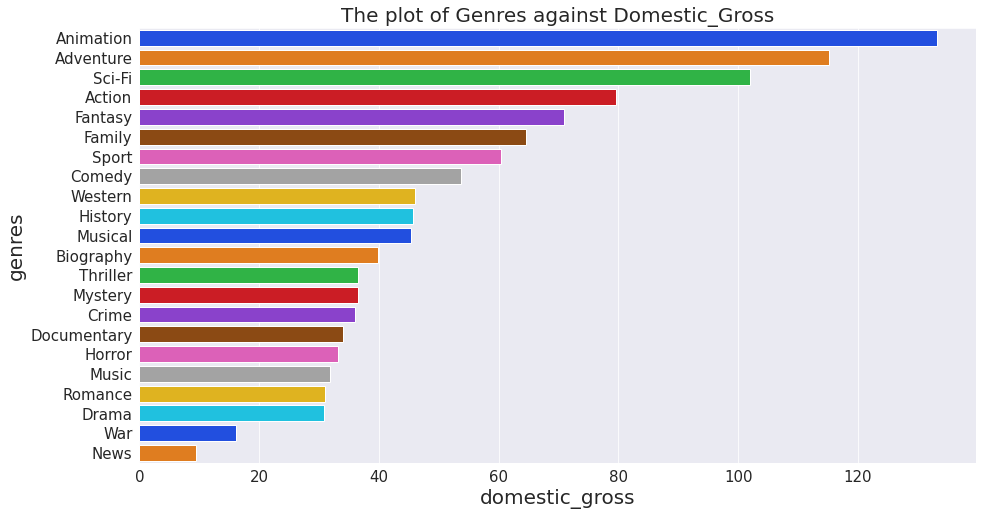

In [223]:
bar_plot(topratings_gross, "domestic_gross", "genres")

Animation, Adventure and Sci-Fi were among the top domestic income earners genres. Therefore it would be appropriate to create content, geared towards targeting this market.

In [227]:
master_df.head()

,domestic_gross,genres,movie,production_budget,start_year,worldwide_gross,combined_avg
5,182.207973,Biography,Lincoln,65000000.0,2012.0,273.346281,7.394126
5,182.207973,Drama,Lincoln,65000000.0,2012.0,273.346281,7.394126
5,182.207973,History,Lincoln,65000000.0,2012.0,273.346281,7.394126
7,0.037151,Comedy,Before We Go,3000000.0,2014.0,0.483938,6.793599
7,0.037151,Drama,Before We Go,3000000.0,2014.0,0.483938,6.793599


In [228]:
# Creating a new dataframe with average worldwide gross earnings per genre
topratings_world_gross = master_df[["movie", "genres", "worldwide_gross"]]
topratings_world_gross = topratings_world_gross.groupby("genres", as_index = False).mean()
topratings_world_gross.sort_values("worldwide_gross", ascending = False, inplace = True)

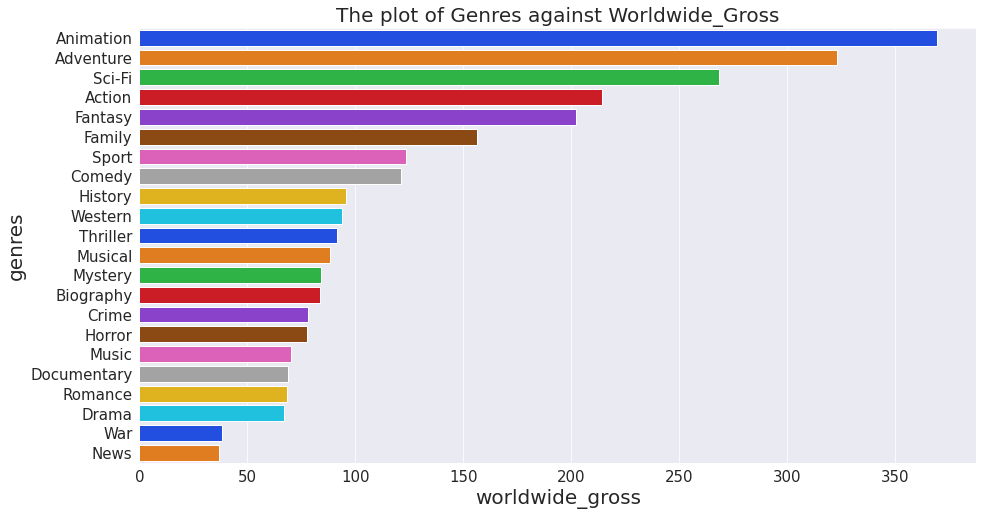

In [229]:
bar_plot(topratings_world_gross, "worldwide_gross", "genres")

Similarly for domestic gross income, Animation, Adventure and Sci-Fi genres are the leading income earners.

## Conclusions

In [ ]:
"""

This analysis leads to three recommendations of what movies to produce for Microsoft’s new movie studio.
For successful, sustained gross earnings over time, They should produce Adventure, Sci-Fi and Animation. 
These two genres have demonstrated consistent success over the years in amassing the most amount of gross earnings.
For immediately successful gross earnings, They should produce movies that are Sci-Fi, Animation, Adventure, Fantasy, or Action. These five genres all average at least 250 million dollars per film.
Create Sci-Fi movies. Knowing that Sci-Fi movies do well in average gross earnings per movie and that the 
market is not overly saturated with Sci-Fi movies, this genre would be the most likely an immediate 
impact on the success of Microsoft studio.


"""